# Machine Learning 3: Neural networks

In [1]:
import numpy as np  
import scipy as sp
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

### Neural networks 

#### A Classification problem

Text(0, 0.5, 'Property B')

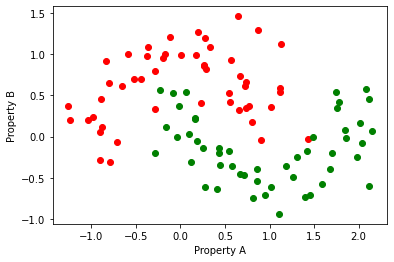

In [2]:
data = np.loadtxt('Data/moonclusterdata2.txt', delimiter=',')
classes = np.loadtxt('Data/moonclusterclasses2.txt', delimiter=',')

nclusters = 2
color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(data[(classes == s),0],data[(classes == s),1],marker='o', color=color[s])
plt.xlabel('Property A')
plt.ylabel('Property B')

The plot above has a lot of scatter in the clusters, hence it is harder to distinguish them. 

Scikit-learn, which contains a function to split out a set of data into two groups should be used to validate the model- by using a set of training data and a separate set of test data.

In [3]:
from sklearn import model_selection
data_train, data_test, classes_train, classes_test = sklearn.model_selection.train_test_split(data, classes, stratify=classes, random_state=42)

print(str(np.size(data_train,0)) + ' elements in training set, ' + str(np.size(data_test,0)) + ' elements in test set.')

75 elements in training set, 25 elements in test set.


In [ ]:
# importing the required functionality for Multi-layer perceptron (MLP) network

In [4]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# creating an `mlp` object and train it using the training data

In [5]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10] , activation='tanh').fit(data_train, classes_train)

The most important parameters for the MLP are the *solver*, which defines the algorithm used to train the network and the hidden layer sizes. In this case the network with two hidden layers is defined, with 10 elements each. In addition, the *activation function* used by each element will also be specified as a tanh function.

One way to regard a neural network is that it is a way to fit a completely general non-linear function to a set of training data as visualised below.

In [ ]:
# using a non-linear function to define a decision boundary for classifying new data

Text(0, 0.5, 'Property B')

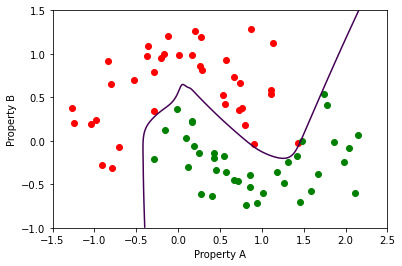

In [6]:
X1, X2 = np.meshgrid(np.linspace(-1.5, 2.5, 1000), np.linspace(-1.0, 1.5, 1000))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = mlp.predict_proba(X_grid)[:, 1]
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

for s in range(nclusters):
    plt.scatter(data_train[(classes_train == s),0],data_train[(classes_train == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])
plt.xlabel('Property A')
plt.ylabel('Property B')

The above plot looks reasonable, but validation of the trained model against the test set is required.

In [ ]:
# using the trained network to classify the test data

In [7]:
classes_predicted = mlp.predict(data_test)

In [8]:
print('Percentage correctly classified: ' + str(np.sum(classes_test==classes_predicted)/np.size(classes_test)*100) + '%')

Percentage correctly classified: 88.0%


In [ ]:
# calculating the performance metric ourselves

In [9]:
mlp.score(data_test,classes_test)

0.88

In [ ]:
# plotting the true classes of the test data along with the decision boundary to visualise this performance

Text(0, 0.5, 'Property B')

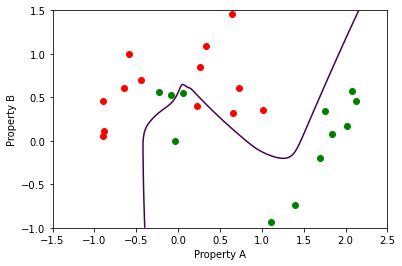

In [10]:
for s in range(nclusters):
    plt.scatter(data_test[(classes_test == s),0],data_test[(classes_test == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])
plt.xlabel('Property A')
plt.ylabel('Property B')

It is observed that the decision boundary isn't quite right for a few of the points.

#### Overfitting

Optimising the decision boundary too finely for the training data gives poor results when attempting to classify the test data, referred to as *over-fitting* and this should be guarded against.

In the case of a MLP neural network, it could be due to using too large a number of neurons in the hidden layers. This would give a very detailed fit to the training data. Hence, below shows a network with two layers of 100 elements each and plot the resulting boundary against the test data. 

Score:  0.88


Text(0, 0.5, 'Property B')

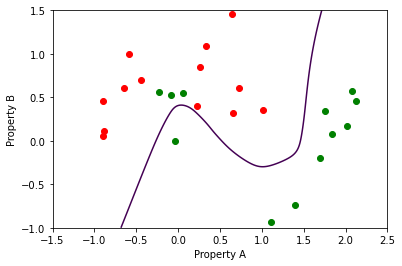

In [11]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100,100] , activation='tanh').fit(data_train, classes_train)
classes_predicted = mlp.predict(data_test)
print('Score: ', mlp.score(data_test,classes_test))

X1, X2 = np.meshgrid(np.linspace(-1.5, 2.5, 1000), np.linspace(-1.0, 1.5, 1000))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = mlp.predict_proba(X_grid)[:, 1]
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

for s in range(nclusters):
    plt.scatter(data_test[(classes_test == s),0],data_test[(classes_test == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])
plt.xlabel('Property A')
plt.ylabel('Property B')

#### Our more sophisticated (larger) network has a *worse* performance on the test set. One way to guard against over-fitting is to systematically explore a range of values for the parameters of the model that you are using (in this case the size of the hidden layers) and plot the performance of the network against both the training and the test set as a function of the parameters. Below we do this for the case of the two layer MLP, using a `for` loop:

/Users/shermane/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Performance score')

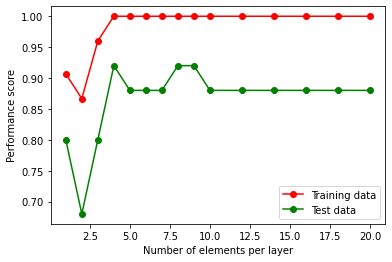

In [12]:
nunits = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
score_train=[]
score_test=[]
for s in nunits:
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[s,s], activation='tanh').fit(data_train, classes_train)
    score_train.append(mlp.score(data_train,classes_train))
    score_test.append(mlp.score(data_test,classes_test))
plt.plot(nunits,score_train,'ro-', label="Training data")
plt.plot(nunits,score_test,'go-', label="Test data")
plt.legend()
plt.xlabel('Number of elements per layer')
plt.ylabel('Performance score')

What do we see? First, as the size of the network increases, the performance against the training set gradually increases. This makes sense, because more elements in the hidden layers will give a decision boundary that more finely fits the details of the training set. However, we see that there is an optimum value for the network size against the test set. Once we get above 4 elements per hidden layer the model starts to over-fit the training data and performance against the test data plateaus and even begins to degrade.

#### <span style="color: red"> Task 5:</span>   Copy the above code and use it to explore the performance of a *single-layer* MLP as a function of network size. (hint: you will need to specify the network size with a single number as follows:   `hidden_layer_sizes=[s]`.)

Text(0, 0.5, 'Performance score')

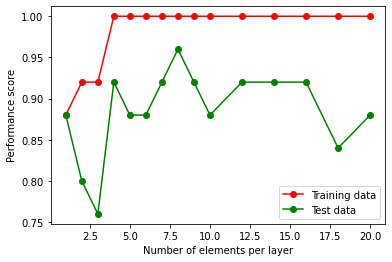

In [13]:
nunits = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
score_train=[]
score_test=[]
for s in nunits:
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[s], activation='tanh').fit(data_train, classes_train)
    score_train.append(mlp.score(data_train,classes_train))
    score_test.append(mlp.score(data_test,classes_test))
plt.plot(nunits,score_train,'ro-', label="Training data")
plt.plot(nunits,score_test,'go-', label="Test data")
plt.legend()
plt.xlabel('Number of elements per layer')
plt.ylabel('Performance score')

In [ ]:
# end of coursework